In [2]:
import numpy as np
import matplotlib.pyplot as plt

# task 1
from scipy.stats import laplace
# task 2
from scipy.stats import binom

In [3]:
sampleCount = 500
sampleSizes = [50, 100, 500, 1000, 2500]
epsilon = 0.01
theta = 0.5

In [4]:
mean, var = laplace.stats(0, theta, moments = "mv")

In [5]:
estimates = np.zeros((sampleCount, len(sampleSizes)))

for i in range(sampleCount):
    for j, n in enumerate(sampleSizes):
        sample = laplace.rvs(scale = theta, size = n)
        estimates[i, j] = np.mean(sample ** 2) / 2

Поскольку в рассматриваемом распределении Лапласа $EX = 0$, а $DX = 2\theta^2$, а также $DX = EX^2 - (EX)^2$, то мы можем выразить $EX^2 = 2\theta^2$
Исходя из метода моментов: $$EX^2 = \frac{1}{n} \sum_{i=1}^n X_i^2$$
Отсюда выражаем $\hat\theta^2$: $$\hat\theta^2 = \frac{\frac{1}{n} \sum_{i=1}^n X_i^2}{2} = \frac{\overline{X^2}}{2}$$

In [6]:
bias = np.mean(estimates, axis = 0) - theta ** 2
variance = np.var(estimates, axis = 0)
mse = np.std(estimates, axis = 0)
count = np.sum(np.abs(estimates - theta ** 2) > epsilon, axis = 0)

print(f"bias: {bias}")
print(f"variance: {variance}")
print(f"mean squared error: {mse}")
print(f"number of variation more than {epsilon}: {count}")

bias: [ 0.00392145 -0.00187332 -0.00337304 -0.00013014 -0.00036441]
variance: [0.00619486 0.00315996 0.00061884 0.00030792 0.00012225]
mean squared error: [0.07870746 0.05621348 0.02487646 0.01754754 0.01105656]
number of variation more than 0.01: [442 417 353 283 169]


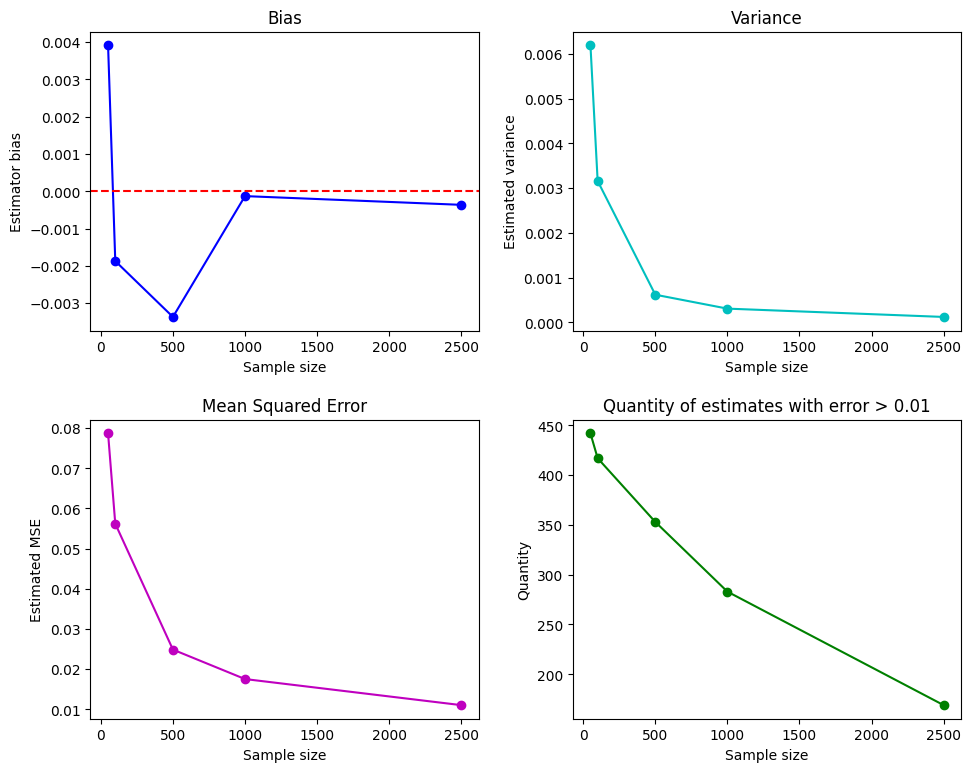

In [7]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
plt.plot(sampleSizes, bias, "bo-")
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.title("Bias")
plt.xlabel("Sample size")
plt.ylabel("Estimator bias")

plt.subplot(2, 2, 2)
plt.plot(sampleSizes, variance, "co-")
plt.title("Variance")
plt.xlabel("Sample size")
plt.ylabel("Estimated variance")

plt.subplot(2, 2, 3)
plt.plot(sampleSizes, mse, "mo-")
plt.title("Mean Squared Error")
plt.xlabel("Sample size")
plt.ylabel("Estimated MSE")

plt.subplot(2, 2, 4)
plt.plot(sampleSizes, count, "go-")
plt.title(f"Quantity of estimates with error > {epsilon}")
plt.xlabel("Sample size")
plt.ylabel("Quantity")

plt.tight_layout(pad = 1.7)
plt.show()

In [8]:
sampleCount = 500
sampleSizes = [50, 100, 500, 1000, 2500]
epsilon = 0.01
n = 4
theta = 1/5

In [9]:
mean, var = binom.stats(n, theta, moments = "mv")

In [10]:
estimates = np.zeros((sampleCount, len(sampleSizes)))

for i in range(sampleCount):
    for j, size in enumerate(sampleSizes):
        sample = binom.rvs(n, theta, size = size)
        estimates[i, j] = sample.mean() / n

Функция правдоподобия для биномиального распределения имеет вид: $$L(\theta) = \prod_{i=1}^{m} {n \choose X_i} \theta^{X_i} (1 - \theta)^{n - X_i}$$
Возьмём логарифм функции и продифференцируем его: $$\ln L(\theta) = \sum_{i=1}^{m} \ln {n \choose X_i} + X_i \ln \theta + (n - X_i) \ln (1 - \theta)$$
$$\frac{d \ln L(\theta)}{d \theta} = \sum_{i=1}^{m} \frac{X_i}{\theta} - \frac{n - X_i}{1 - \theta} = 0$$
Так как нам нужно найти максимум функции, приравняем производную к нулю, далее путём математических преобраазований сведём функцию к виду: $$n \overline{X} = \hat\theta n^2$$
И выразим из него оценку параметра $\hat\theta$: $$\hat\theta = \frac{\overline{X}}{n}$$

In [11]:
bias = np.mean(estimates, axis = 0) - theta
variance = np.var(estimates, axis = 0)
mse = np.std(estimates, axis = 0)
count = np.sum(np.abs(estimates - theta) > epsilon, axis = 0)

print(f"bias: {bias}")
print(f"variance: {variance}")
print(f"mean squared error: {mse}")
print(f"number of variation more than {epsilon}: {count}")

bias: [ 0.00133   -0.00047   -0.000832  -0.0002835  0.0003114]
variance: [8.17181100e-04 3.87129100e-04 6.90817760e-05 3.66610027e-05
 1.57364900e-05]
mean squared error: [0.02858638 0.0196756  0.00831154 0.00605483 0.00396692]
number of variation more than 0.01: [369 315 110  53   7]


Для того чтобы определить смещение нам необходимо найти $E\hat\theta$. Для этого воспользуемся законом больших чисел:
$$E \hat\theta = E \frac{\overline{X_i}}{n} \xrightarrow{i \rightarrow \infty} \frac{n\theta}{n} = \theta$$
Поскольку $E \hat\theta - \theta = 0$, то наша оценка не смещена

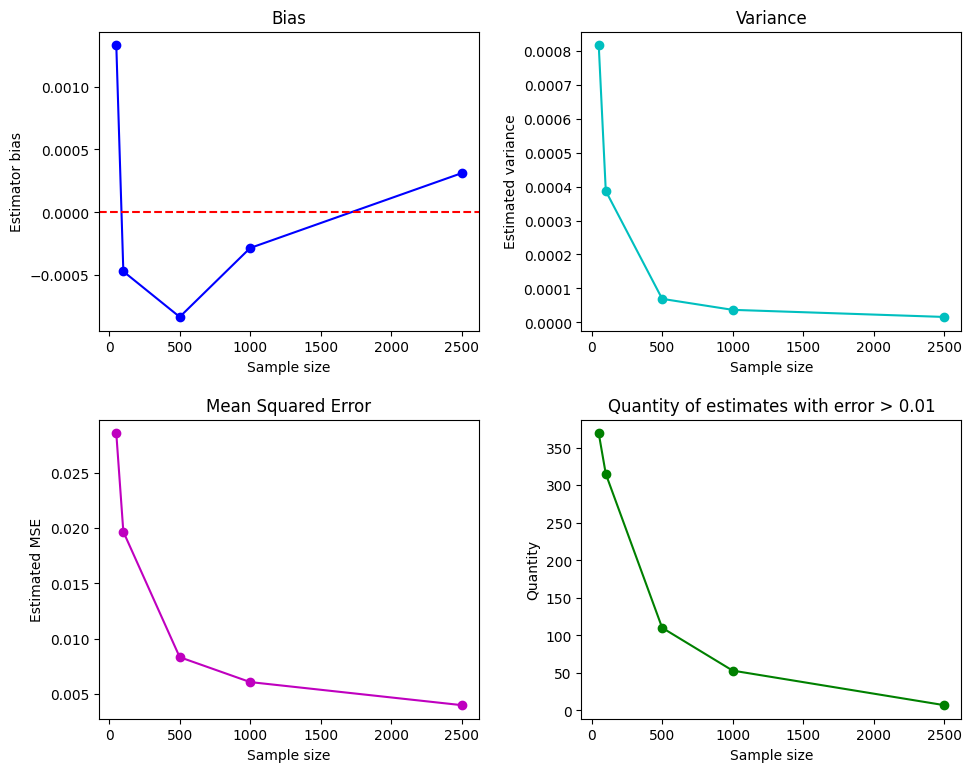

In [12]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
plt.plot(sampleSizes, bias, "bo-")
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.title("Bias")
plt.xlabel("Sample size")
plt.ylabel("Estimator bias")

plt.subplot(2, 2, 2)
plt.plot(sampleSizes, variance, "co-")
plt.title("Variance")
plt.xlabel("Sample size")
plt.ylabel("Estimated variance")

plt.subplot(2, 2, 3)
plt.plot(sampleSizes, mse, "mo-")
plt.title("Mean Squared Error")
plt.xlabel("Sample size")
plt.ylabel("Estimated MSE")

plt.subplot(2, 2, 4)
plt.plot(sampleSizes, count, "go-")
plt.title(f"Quantity of estimates with error > {epsilon}")
plt.xlabel("Sample size")
plt.ylabel("Quantity")

plt.tight_layout(pad = 1.7)
plt.show()